In [ ]:
#Loading and Preprocessing

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
# Drop the target column (species)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Clustering Algorithm Implementation

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
#KMeans Clustering
KMeans is a centroid-based clustering algorithm that partitions data into K clusters by:
Randomly initializing K centroids,Assigning each point to the nearest centroid,
Updating centroids by computing the mean of assigned points,Repeating steps 2–3 until convergence.

#KMeans is suitable for Iris:
Iris dataset has numeric, well-separated features.
It naturally forms 3 clusters (matching the 3 species).
KMeans works well when clusters are spherical and equally sized, which aligns with the Iris dataset

In [9]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

C:\Users\91940\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

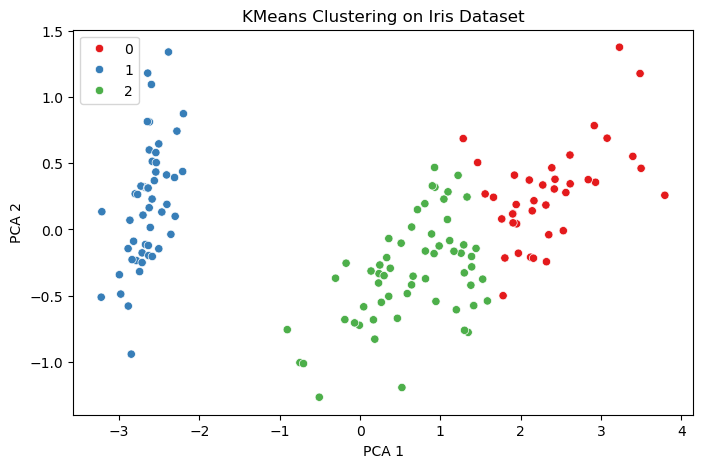

In [13]:
# Plotting
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=kmeans_labels, palette='Set1')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [ ]:
#Hierarchical Clustering
Hierarchical clustering builds nested clusters by:
Agglomerative method: Starts with each point as a separate cluster, then merges closest pairs until one cluster remains.
The structure is visualized using a dendrogram.

#suitable for Iris:
Useful to understand relationships between species.
Doesn’t require number of clusters in advance (can cut dendrogram at any level).
Can reveal hierarchical structure.

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [19]:
# Generate linkage matrix
Z = linkage(df, method='ward')

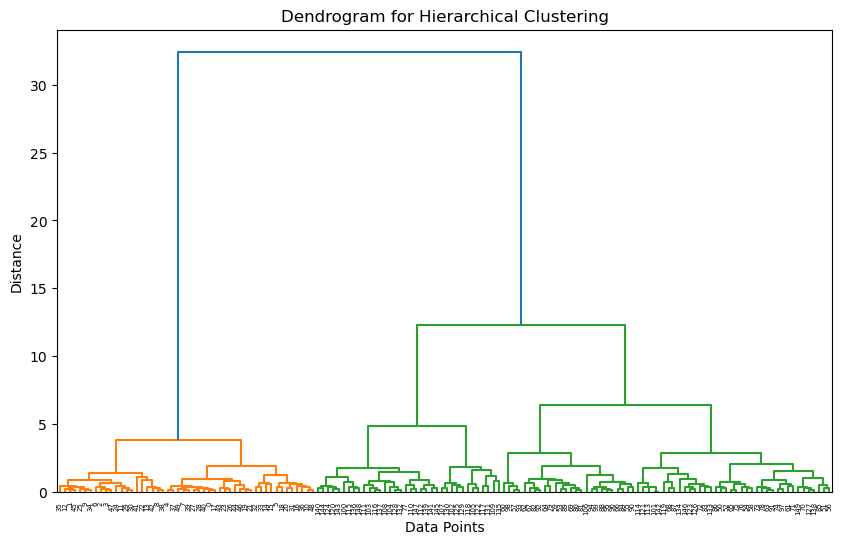

In [21]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [23]:
# Cut dendrogram to form 3 clusters
hier_labels = fcluster(Z, t=3, criterion='maxclust')

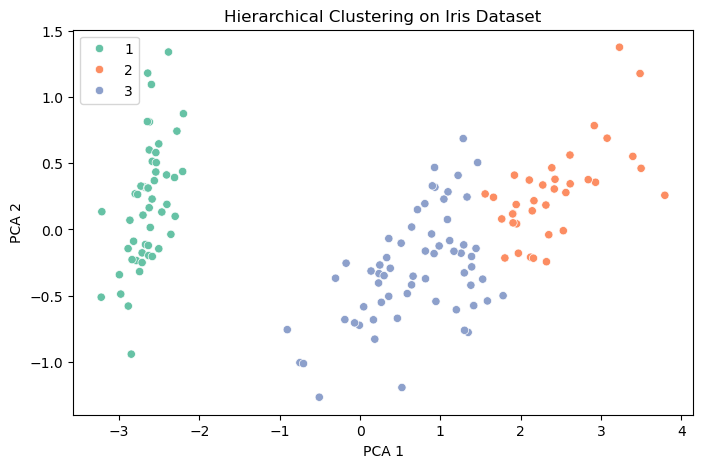

In [25]:
# Visualize
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=hier_labels, palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()